In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
def _process_name(x: str, add: str) -> str:
    if not isinstance(x, str):
        return "unknown"
    x = x.lower()
    if x == "marszałek":
        return f"marszałek {add}"
    x = x.replace("marszałek", "").replace("poseł", "").replace("sekretarz", "").replace("wice", "").replace("senator", "")
    return x

In [3]:
df_sejm = pd.read_csv('data/sejm_main_df_all_years.csv')
df_senat = pd.read_csv('data/senat_df_all_years.csv')
with open('data/sejm_2021-2023.pkl', 'rb') as f:
    df_sejm_ft = pickle.load(f)
with open('data/senat_2021-2023.pkl', 'rb') as f:
    df_senat_ft = pickle.load(f)

df_sejm['place'] = 'sejm'
df_senat['place'] = 'senat'
df_sejm_ft['place'] = 'sejm'
df_senat_ft['place'] = 'senat'
df_sejm['name'] = df_sejm['name'].apply(lambda x: _process_name(x, "sejmu"))
df_senat['name'] = df_senat['name'].apply(lambda x: _process_name(x, "senatu"))
df_sejm_ft['author'] = df_sejm_ft['author'].apply(lambda x: _process_name(x, "sejmu"))
df_senat_ft['author'] = df_senat_ft['author'].apply(lambda x: _process_name(x, "senatu"))
df_main = pd.concat([df_sejm, df_senat], ignore_index=True)
df_main.rename({'name': 'author', 'text': 'texts'}, axis=1, inplace=True)
df_main['date'] = pd.to_datetime(df_main['date'], errors="coerce")
df_ft = pd.concat([df_sejm_ft, df_senat_ft], ignore_index=True)
df_full = pd.concat([df_main, df_ft], ignore_index=True)
df_full['date'] = df_full['date'].dt.strftime('%Y-%m-%d')
df_full

,date,author,texts,place
0,2017-06-20,marszałek sejmu,Otwieram posiedzenie.,sejm
1,2017-06-20,marszałek sejmu,Na sekretarzy dzisiejszych obrad powołujemy po...,sejm
2,2017-06-20,marszałek sejmu,W pierwszej części obrad sekretarzami będą pos...,sejm
3,2017-06-20,marszałek sejmu,Protokół i listę mówców prowadzić będą posłowi...,sejm
4,2017-06-20,marszałek sejmu,Protokół 43. posiedzenia Sejmu uważam za przyj...,sejm
...,...,...,...,...
5780266,2022-04-28,bogdan borusewicz,Wznawiam obrady.Oświadczenie wygłosi senator B...,senat
5780267,2022-04-28,jolanta hibner,"Dziękuję, Panie Marszałku.Ja zwracam się nie t...",senat
5780268,2022-04-28,bogdan borusewicz,"Dziękuję, Pani Senator.Proszę o zabranie głosu...",senat
5780269,2022-04-28,adam szejnfeld,"Dziękuję bardzo, Panie Marszałku.Swoje oświadc...",senat


In [4]:
df_full = df_full.rename(columns={'texts': 'text'})

In [5]:
import os
# directory with all tweets and replies
directory_path = "data/all_data"
dfs = []
for filename in os.listdir(directory_path):
    if filename.endswith("tweets.pkl"):
        file_path = os.path.join(directory_path, filename)
        
        # Load the pickled DataFrame
        df_list = pd.read_pickle(file_path)
        df = df = pd.DataFrame(df_list)
        dfs.append(df)

# Concatenate the DataFrames
tweets_concat = pd.concat(dfs)
tweets_concat

,tweet_id,tweet_url,username,is_retweet,is_pinned,time,text,replies,retweets,likes,entries
0,1369596150165209089,/CTomczyk/status/1369596150165209089#m,CTomczyk,False,True,2021-03-10 10:29:00,2009- @DanielObajtek kupuje ziemie 2011- Przep...,1336.0,2609.0,6765.0,"{'hashtags': [], 'cashtags': [], 'urls': [], '..."
1,1720526227486695554,/SlawomirNitras/status/1720526227486695554#m,SlawomirNitras,True,False,2023-11-03 19:39:00,Brudziński i jego kumple upaśli się na Azotach...,247.0,423.0,2535.0,"{'hashtags': [], 'cashtags': [], 'urls': [], '..."
2,1720493136617599282,/tvnwarszawa/status/1720493136617599282#m,tvnwarszawa,True,False,2023-11-03 17:28:00,Były szef marszu narodowców i były kandydat na...,98.0,193.0,1289.0,"{'hashtags': [], 'cashtags': [], 'urls': ['htt..."
3,1720486889893831048,/EwaKopacz/status/1720486889893831048#m,EwaKopacz,True,False,2023-11-03 17:03:00,Ostatniej nocy Rosja dopuściła się kolejnego z...,30.0,41.0,240.0,"{'hashtags': [], 'cashtags': [], 'urls': [], '..."
4,1720104916373410227,/CTomczyk/status/1720104916373410227#m,CTomczyk,True,False,2023-11-02 15:45:00,"-Czystki wśród oficerów -Unieważnione(Orlik,Wi...",276.0,280.0,1166.0,"{'hashtags': [], 'cashtags': [], 'urls': [], '..."
...,...,...,...,...,...,...,...,...,...,...,...
688,1692193028323057858,/Campus_Polska/status/1692193028323057858#m,Campus_Polska,True,False,2023-08-17 15:13:00,"Jak powinno się rozliczyć osoby, które stanowi...",63.0,84.0,241.0,"{'hashtags': ['#Campus2023'], 'cashtags': [], ..."
689,1691885284563247159,/Platforma_org/status/1691885284563247159#m,Platforma_org,True,False,2023-08-16 18:51:00,.@Gasiuk_Pihowicz naszą jedynką w Siedlcach #P...,101.0,194.0,1296.0,"{'hashtags': ['#PolskaWNaszychSercach'], 'cash..."
690,1691890569361109458,/Platforma_org/status/1691890569361109458#m,Platforma_org,True,False,2023-08-16 19:12:00,.@pomaska naszą jedynką w Gdańsku #PolskaWNasz...,103.0,303.0,2172.0,"{'hashtags': ['#PolskaWNaszychSercach'], 'cash..."
691,1691886039541981629,/Platforma_org/status/1691886039541981629#m,Platforma_org,True,False,2023-08-16 18:54:00,Przewodniczący @donaldtusk naszą jedynką w War...,820.0,929.0,7143.0,"{'hashtags': ['#PolskaWNaszychSercach'], 'cash..."


In [6]:
with open('data/users_names.txt', 'r') as file:
    usernames_list = [username.strip().lower() for username in file.readlines()]
usernames_list = list(filter(None, usernames_list))
len(usernames_list)

144

In [7]:
def is_user_in_list(author, user_list):
    for user in user_list:
        if user in author:
            return True
    return False

# Filter the DataFrame based on the condition
filtered_df = df_full[df_full['author'].apply(lambda x: is_user_in_list(x, usernames_list))]
filtered_df

,date,author,text,place
28,2017-06-20,sławomir nitras,"Dziękuję, panie marszałku.",sejm
29,2017-06-20,sławomir nitras,Szanowny Panie Marszałku! Chciałbym zwrócić uw...,sejm
30,2017-06-20,sławomir nitras,"To jest proceder, który trwa od dłuższego czas...",sejm
31,2017-06-20,sławomir nitras,"Panie marszałku, poddaje pan pod głosowanie pu...",sejm
35,2017-06-20,sławomir nitras,(Skąd ten pośpiech w związku z tym?),sejm
...,...,...,...,...
5780245,2022-04-28,tomasz grodzki,Proszę sprawozdawcę mniejszości połą-czonych k...,senat
5780247,2022-04-28,tomasz grodzki,Dziękuję bardzo.Przystępujemy zatem do głosowa...,senat
5780249,2022-04-28,tomasz grodzki,Dziękuję bardzo.Obecnie senatorowie mogą zgłas...,senat
5780251,2022-04-28,tomasz grodzki,Obecnie senatorowie mogą zgłaszać trwające nie...,senat


In [8]:
filtered_df['author'].unique()[:20]

array([' sławomir nitras', ' małgorzata kidawa-błońska',
       ' barbara bartuś', ' waldemar andzel', ' ryszard terlecki',
       ' beata mazurek', ' bożena borys-szopa', ' zofia czernow',
       ' sprawozdawca bożena borys-szopa', ' marta golbik',
       ' joanna lichocka', ' agnieszka pomaska', ' jarosław gonciarz',
       ' grzegorz schetyna', ' urszula augustyn', ' anita czerwińska',
       ' witold czarnecki', ' kinga gajewska-płochocka',
       ' małgorzata chmiel', ' ryszard bartosik'], dtype=object)

In [9]:
with open('data/users.txt', 'r') as file:
    users = [username.strip().lower() for username in file.readlines()]
users = list(filter(None, users))
len(users)

144

In [10]:
tweets_concat = tweets_concat[tweets_concat['username'].isin(users)]
tweets_concat['author'] = tweets_concat['username'].map(dict(zip(users, usernames_list)))
tweets_concat = tweets_concat.drop('entries', axis=1)
tweets_concat['time'] = tweets_concat['time'].dt.strftime('%Y-%m-%d')
tweets_concat['place'] = 'twitter'
tweets_concat = tweets_concat.rename(columns={'texts': 'text', "time": "date"})

tweets_concat

/var/folders/bm/ftw8z7yx4x7__tj58fqqzvcm0000gn/T/ipykernel_32051/1439875268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_concat['author'] = tweets_concat['username'].map(dict(zip(users, usernames_list)))


,tweet_id,tweet_url,username,is_retweet,is_pinned,date,text,replies,retweets,likes,author,place
10,1720011855823765544,/trzaskowski_/status/1720011855823765544#m,trzaskowski_,True,False,2023-11-02,Wiadomość prosto od mera Kijowa @Vitaliy_Klych...,457.0,399.0,3461.0,rafał trzaskowski,twitter
12,1719636816771285367,/pomaska/status/1719636816771285367#m,pomaska,True,False,2023-11-01,PiS jest znany z przecinania wstęgi po kilka r...,469.0,224.0,1034.0,agnieszka pomaska,twitter
16,1719378456910221417,/donaldtusk/status/1719378456910221417#m,donaldtusk,True,False,2023-10-31,Meldunek od serca.,2253.0,2383.0,11381.0,donald tusk,twitter
20,1718925236274336067,/pomaska/status/1718925236274336067#m,pomaska,True,False,2023-10-30,Drastyczny wzrost ceny hurtowej oleju napędowe...,155.0,180.0,562.0,agnieszka pomaska,twitter
43,1716753316548432358,/pomaska/status/1716753316548432358#m,pomaska,True,False,2023-10-24,Transmisja konferencji prasowej opozycji w TVP...,549.0,388.0,3479.0,agnieszka pomaska,twitter
...,...,...,...,...,...,...,...,...,...,...,...,...
648,1694294016722895078,/donaldtusk/status/1694294016722895078#m,donaldtusk,True,False,2023-08-23,Nie pękamy!,1380.0,1992.0,8653.0,donald tusk,twitter
656,1693572827016745342,/donaldtusk/status/1693572827016745342#m,donaldtusk,True,False,2023-08-21,"Drogi Jarosławie, nie ma się co bać.",2421.0,3200.0,12777.0,donald tusk,twitter
672,1359445305981304832,/donaldtusk/status/1359445305981304832#m,donaldtusk,True,False,2021-02-10,Niektórzy wciąż „obiektywnie” komentują umiera...,1043.0,2627.0,14287.0,donald tusk,twitter
679,1692501505427816454,/donaldtusk/status/1692501505427816454#m,donaldtusk,True,False,2023-08-18,"""Lex Tusk"" tango down. Dziękuję Wam.",1658.0,2782.0,11172.0,donald tusk,twitter


In [11]:
df_full['username'] = df_full['author'].map(dict(zip(usernames_list, users)))
df_full

,date,author,text,place,username
0,2017-06-20,marszałek sejmu,Otwieram posiedzenie.,sejm,NaN
1,2017-06-20,marszałek sejmu,Na sekretarzy dzisiejszych obrad powołujemy po...,sejm,NaN
2,2017-06-20,marszałek sejmu,W pierwszej części obrad sekretarzami będą pos...,sejm,NaN
3,2017-06-20,marszałek sejmu,Protokół i listę mówców prowadzić będą posłowi...,sejm,NaN
4,2017-06-20,marszałek sejmu,Protokół 43. posiedzenia Sejmu uważam za przyj...,sejm,NaN
...,...,...,...,...,...
5780266,2022-04-28,bogdan borusewicz,Wznawiam obrady.Oświadczenie wygłosi senator B...,senat,NaN
5780267,2022-04-28,jolanta hibner,"Dziękuję, Panie Marszałku.Ja zwracam się nie t...",senat,NaN
5780268,2022-04-28,bogdan borusewicz,"Dziękuję, Pani Senator.Proszę o zabranie głosu...",senat,NaN
5780269,2022-04-28,adam szejnfeld,"Dziękuję bardzo, Panie Marszałku.Swoje oświadc...",senat,NaN


In [12]:
fd = df_full[df_full['username'].notna()]
fd

,date,author,text,place,username
1670121,2008-11-07,marek borowski,(Porozmawiamy za parę miesięcy.),sejm,marekborowski
2067420,NaN,leszek balcerowicz,Proszę Państwa! Pani Marszałek! Wysoka Izbo! C...,sejm,lbalcerowicz
2067421,NaN,leszek balcerowicz,"Teraz chciałem powiedzieć generalnie, że rząd ...",sejm,lbalcerowicz
2067422,NaN,leszek balcerowicz,"Natomiast z całą pewnością różnimy się, przyna...",sejm,lbalcerowicz
2067423,NaN,leszek balcerowicz,"Teraz, proszę państwa, chciałbym odnieść się m...",sejm,lbalcerowicz
...,...,...,...,...,...
5033283,1990-12-28,leszek balcerowicz,"Po trzecie, chciałem zwrócić uwagę na to, że j...",senat,lbalcerowicz
5033284,1990-12-28,leszek balcerowicz,"Wreszcie chciałem powiedzieć, że ta ustawa zwi...",senat,lbalcerowicz
5033285,1990-12-28,leszek balcerowicz,"Toteż, aby tej tendencji przeciwdziałać, istot...",senat,lbalcerowicz
5033286,1990-12-28,leszek balcerowicz,"Chciałem w każdym razie zwrócić uwagę na to, ż...",senat,lbalcerowicz


In [13]:
concatenated_df = pd.concat([tweets_concat, df_full], ignore_index=True)
concatenated_df

,tweet_id,tweet_url,username,is_retweet,is_pinned,date,text,replies,retweets,likes,author,place
0,1.720012e+18,/trzaskowski_/status/1720011855823765544#m,trzaskowski_,True,False,2023-11-02,Wiadomość prosto od mera Kijowa @Vitaliy_Klych...,457.0,399.0,3461.0,rafał trzaskowski,twitter
1,1.719637e+18,/pomaska/status/1719636816771285367#m,pomaska,True,False,2023-11-01,PiS jest znany z przecinania wstęgi po kilka r...,469.0,224.0,1034.0,agnieszka pomaska,twitter
2,1.719378e+18,/donaldtusk/status/1719378456910221417#m,donaldtusk,True,False,2023-10-31,Meldunek od serca.,2253.0,2383.0,11381.0,donald tusk,twitter
3,1.718925e+18,/pomaska/status/1718925236274336067#m,pomaska,True,False,2023-10-30,Drastyczny wzrost ceny hurtowej oleju napędowe...,155.0,180.0,562.0,agnieszka pomaska,twitter
4,1.716753e+18,/pomaska/status/1716753316548432358#m,pomaska,True,False,2023-10-24,Transmisja konferencji prasowej opozycji w TVP...,549.0,388.0,3479.0,agnieszka pomaska,twitter
...,...,...,...,...,...,...,...,...,...,...,...,...
5791492,NaN,NaN,NaN,NaN,NaN,2022-04-28,Wznawiam obrady.Oświadczenie wygłosi senator B...,NaN,NaN,NaN,bogdan borusewicz,senat
5791493,NaN,NaN,NaN,NaN,NaN,2022-04-28,"Dziękuję, Panie Marszałku.Ja zwracam się nie t...",NaN,NaN,NaN,jolanta hibner,senat
5791494,NaN,NaN,NaN,NaN,NaN,2022-04-28,"Dziękuję, Pani Senator.Proszę o zabranie głosu...",NaN,NaN,NaN,bogdan borusewicz,senat
5791495,NaN,NaN,NaN,NaN,NaN,2022-04-28,"Dziękuję bardzo, Panie Marszałku.Swoje oświadc...",NaN,NaN,NaN,adam szejnfeld,senat


In [14]:
concatenated_df = concatenated_df.drop_duplicates()

In [24]:
concatenated_df

,tweet_id,tweet_url,username,is_retweet,is_pinned,date,text,replies,retweets,likes,author,place
0,1.720012e+18,/trzaskowski_/status/1720011855823765544#m,trzaskowski_,True,False,2023-11-02,Wiadomość prosto od mera Kijowa @Vitaliy_Klych...,457.0,399.0,3461.0,rafał trzaskowski,twitter
1,1.719637e+18,/pomaska/status/1719636816771285367#m,pomaska,True,False,2023-11-01,PiS jest znany z przecinania wstęgi po kilka r...,469.0,224.0,1034.0,agnieszka pomaska,twitter
2,1.719378e+18,/donaldtusk/status/1719378456910221417#m,donaldtusk,True,False,2023-10-31,Meldunek od serca.,2253.0,2383.0,11381.0,donald tusk,twitter
3,1.718925e+18,/pomaska/status/1718925236274336067#m,pomaska,True,False,2023-10-30,Drastyczny wzrost ceny hurtowej oleju napędowe...,155.0,180.0,562.0,agnieszka pomaska,twitter
4,1.716753e+18,/pomaska/status/1716753316548432358#m,pomaska,True,False,2023-10-24,Transmisja konferencji prasowej opozycji w TVP...,549.0,388.0,3479.0,agnieszka pomaska,twitter
...,...,...,...,...,...,...,...,...,...,...,...,...
5791492,NaN,NaN,NaN,NaN,NaN,2022-04-28,Wznawiam obrady.Oświadczenie wygłosi senator B...,NaN,NaN,NaN,bogdan borusewicz,senat
5791493,NaN,NaN,NaN,NaN,NaN,2022-04-28,"Dziękuję, Panie Marszałku.Ja zwracam się nie t...",NaN,NaN,NaN,jolanta hibner,senat
5791494,NaN,NaN,NaN,NaN,NaN,2022-04-28,"Dziękuję, Pani Senator.Proszę o zabranie głosu...",NaN,NaN,NaN,bogdan borusewicz,senat
5791495,NaN,NaN,NaN,NaN,NaN,2022-04-28,"Dziękuję bardzo, Panie Marszałku.Swoje oświadc...",NaN,NaN,NaN,adam szejnfeld,senat


In [25]:
len(concatenated_df['author'].unique())


18345

In [28]:
concatenated_df['date'] = pd.to_datetime(concatenated_df['date'], errors="coerce")
concatenated_df

/var/folders/bm/ftw8z7yx4x7__tj58fqqzvcm0000gn/T/ipykernel_32051/3880934206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concatenated_df['date'] = pd.to_datetime(concatenated_df['date'], errors="coerce")


,tweet_id,tweet_url,username,is_retweet,is_pinned,date,text,replies,retweets,likes,author,place
0,1.720012e+18,/trzaskowski_/status/1720011855823765544#m,trzaskowski_,True,False,2023-11-02,Wiadomość prosto od mera Kijowa @Vitaliy_Klych...,457.0,399.0,3461.0,rafał trzaskowski,twitter
1,1.719637e+18,/pomaska/status/1719636816771285367#m,pomaska,True,False,2023-11-01,PiS jest znany z przecinania wstęgi po kilka r...,469.0,224.0,1034.0,agnieszka pomaska,twitter
2,1.719378e+18,/donaldtusk/status/1719378456910221417#m,donaldtusk,True,False,2023-10-31,Meldunek od serca.,2253.0,2383.0,11381.0,donald tusk,twitter
3,1.718925e+18,/pomaska/status/1718925236274336067#m,pomaska,True,False,2023-10-30,Drastyczny wzrost ceny hurtowej oleju napędowe...,155.0,180.0,562.0,agnieszka pomaska,twitter
4,1.716753e+18,/pomaska/status/1716753316548432358#m,pomaska,True,False,2023-10-24,Transmisja konferencji prasowej opozycji w TVP...,549.0,388.0,3479.0,agnieszka pomaska,twitter
...,...,...,...,...,...,...,...,...,...,...,...,...
5791492,NaN,NaN,NaN,NaN,NaN,2022-04-28,Wznawiam obrady.Oświadczenie wygłosi senator B...,NaN,NaN,NaN,bogdan borusewicz,senat
5791493,NaN,NaN,NaN,NaN,NaN,2022-04-28,"Dziękuję, Panie Marszałku.Ja zwracam się nie t...",NaN,NaN,NaN,jolanta hibner,senat
5791494,NaN,NaN,NaN,NaN,NaN,2022-04-28,"Dziękuję, Pani Senator.Proszę o zabranie głosu...",NaN,NaN,NaN,bogdan borusewicz,senat
5791495,NaN,NaN,NaN,NaN,NaN,2022-04-28,"Dziękuję bardzo, Panie Marszałku.Swoje oświadc...",NaN,NaN,NaN,adam szejnfeld,senat


In [32]:
import seaborn as sns
def plot_in_time(df, ax, x, c):
    df['m'] = df.date.dt.round('D')
    df_fl = df.groupby('m').count()
    sns.scatterplot(df_fl, x='m', y='text', ax=ax, color=c)
    ax.set_xlabel('Data')
    ax.set_ylabel('Aktywność')
    ax.set_title(f'Rozkład aktywności w czasie dla {x}')

/var/folders/bm/ftw8z7yx4x7__tj58fqqzvcm0000gn/T/ipykernel_32051/2556519226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['m'] = df.date.dt.round('D')


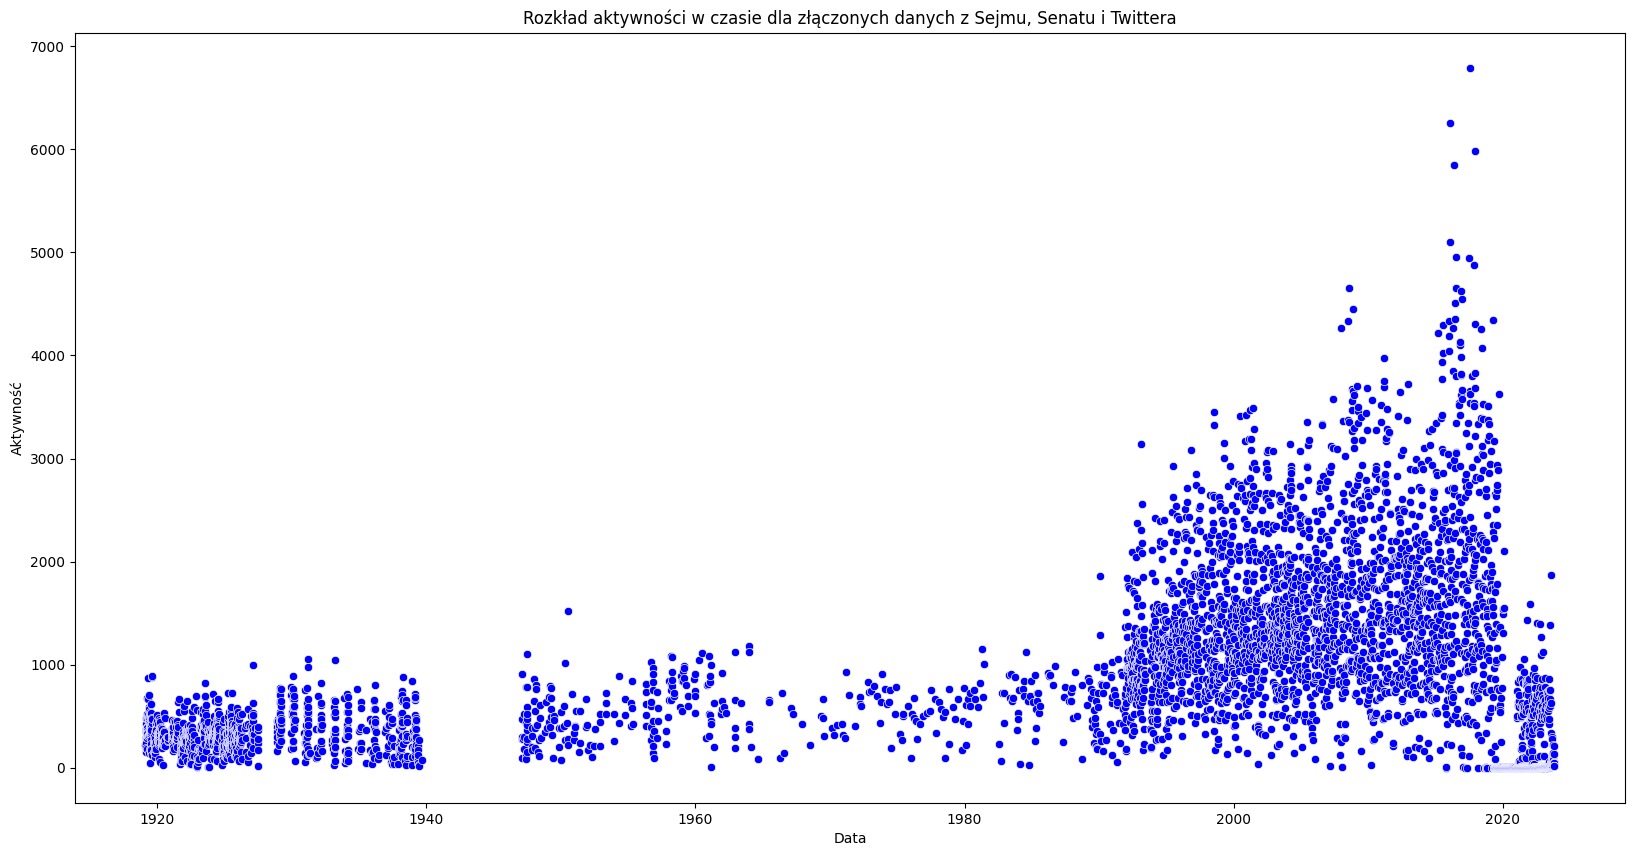

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plot_in_time(concatenated_df, ax, 'złączonych danych z Sejmu, Senatu i Twittera', c='blue')
plt.show()

In [35]:
grouped = concatenated_df.groupby(['place', 'author']).size().reset_index(name='post_count')

result = grouped.groupby('place')['post_count'].agg(['mean', 'std', 'min', 'max'])

print(result)

               mean          std  min     max
place                                        
sejm     258.851073  4060.022847    1  460266
senat    215.639301  1518.839102    1   53645
twitter  279.102564   229.081552    8     905
